<a href="https://colab.research.google.com/github/zzcn23/Unit2ExcercisesCannon/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials can help models better fit curves and capture patterns in data. They're helpful for more complicated data sets because they capture non linear trends and different shapes of relationships.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

You wouldn't want to include polynomials in simpler data sets as it can cause overfitting and make the model too senstive to noise in the data

**Task3**:

What's the point of using b splines?

B splines are a type of piecewise polynomial function that break a function into segments connected at knots. They can capture relationships not captured by a simple function.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a probabilistic model that uses kernels to model compelx relationships by assuming a function to predict and capture the data.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [2]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-zi74p4l1
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-zi74p4l1
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=e6dd211cbb8a02d21683e0694b6beb81a619bf86f44c56b85c864ecbf7ae2b8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-i4slhrzf/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.8 MB/s eta 0:00:00
   ━

In [3]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [4]:
#downloads the data from my github
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

In [8]:
#degree 2 polynomial model for temp
model_poly_2_b = bmb. Model
model_poly_2_b = bmb.Model("weight ~ poly(height, degree=2)", howell, family="negativebinomial")
idata_poly_2_b = model_poly_2_b.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


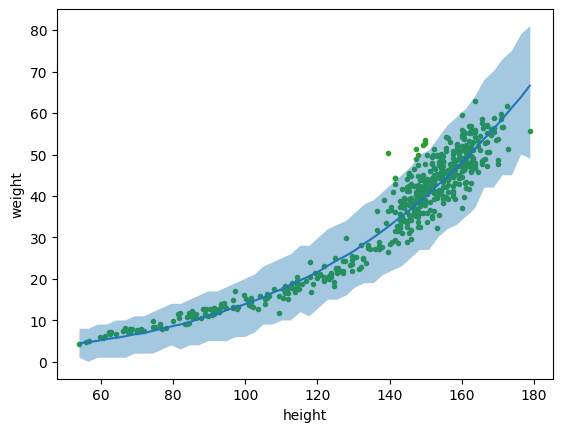

In [9]:
bmb.interpret.plot_predictions(model_poly_2_b, idata_poly_2_b, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

This fits pretty well, there are a few outliers but the main trend is captured well

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that you can use samples from the posterior of the Gaussian process to interpolate observed data and predict future trajectories of the data.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I like the fit and possible forecasts graph with a consolidated trendline. The uncertainty intervals are interesting and I think its cool that the posterior samples provide a range of possible future trajectories of CO2 emissions.
